In [32]:
include("rg.jl")
include("ising2d.jl")
include("hotrg2d.jl")

HOTRG_2D_trunc_y (generic function with 1 method)

In [33]:
crit_temp = Tc(Ising2D(;J=1,H=0,β=1))
βc = 1/crit_temp

0.44068679350977147

In [52]:
βs = Vector{Float64}()
lnZs = Vector{Float64}()
T_final = Vector{TensorMap}()

for β in LinRange(0.8*βc,1.2*βc,100)
    @show  β 
    model = Ising2D(;β=β,J=1,H=0)
    ising_T0 = T0(model,:Z2);
    χ = 10
    layers = RG_layers{HOTRG2D_layer}(ising_T0,χ,1);
    layers = renormalize(layers,50);
    push!(βs,β);
    push!(lnZs,real(lnz(layers,50)));
    push!(T_final,layers.layers[end].T)
end

β = 0.3525494348078172
β = 0.3543299875088668
β = 0.35611054020991634
β = 0.35789109291096594
β = 0.3596716456120155
β = 0.36145219831306513
β = 0.36323275101411473
β = 0.3650133037151643
β = 0.36679385641621387
β = 0.3685744091172634
β = 0.370354961818313
β = 0.37213551451936255
β = 0.37391606722041215
β = 0.37569661992146175
β = 0.37747717262251135
β = 0.37925772532356095
β = 0.3810382780246105
β = 0.3828188307256601
β = 0.38459938342670963
β = 0.3863799361277592
β = 0.3881604888288088
β = 0.3899410415298584
β = 0.39172159423090797
β = 0.3935021469319576
β = 0.3952826996330071
β = 0.3970632523340567
β = 0.3988438050351063
β = 0.4006243577361559
β = 0.40240491043720544
β = 0.40418546313825504
β = 0.4059660158393047
β = 0.4077465685403542
β = 0.4095271212414038
β = 0.4113076739424534
β = 0.413088226643503
β = 0.4148687793445525
β = 0.4166493320456021
β = 0.41842988474665177
β = 0.42021043744770126
β = 0.42199099014875086
β = 0.42377154284980045
β = 0.42555209555085005
β = 0.42733264825

In [53]:
using Plots 
    

In [54]:
function get_diff(x,y)
    x_bar = 0.5*(x[2:end] .+ x[1:end-1])
    dydx = (y[2:end] .- y[1:end-1]) ./ (x[2:end] .- x[1:end-1])
    return x_bar, dydx
end


get_diff (generic function with 1 method)

In [55]:
βₘ, dlnZdβs = get_diff(βs,lnZs);
βₘₘ, d²lnZdβ²s = get_diff(βₘ, dlnZdβs);

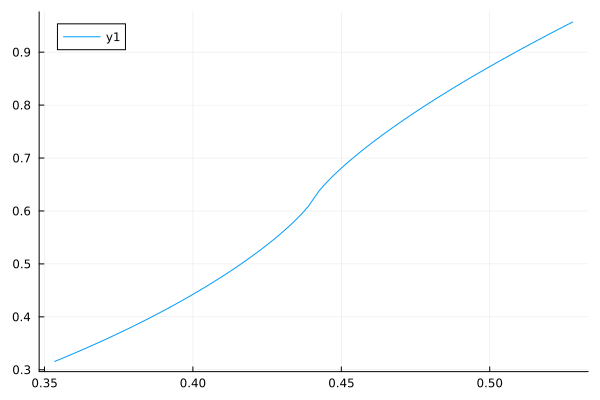

In [56]:
plot(βₘ,βₘ.* dlnZdβs)

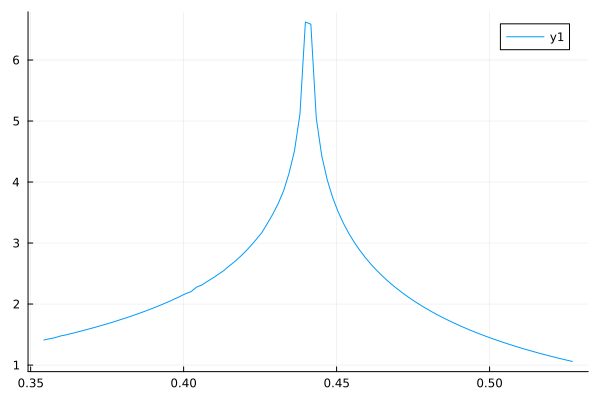

In [57]:
plot(βₘₘ , βₘₘ.*d²lnZdβ²s)

In [58]:
lnZs 

100-element Vector{Float64}:
 0.8322744725483975
 0.8338650848576928
 0.835468320069815
 0.8370842932918323
 0.8387130908490901
 0.8403548965412897
 0.8420098037754119
 0.8436779402428686
 0.8453594372592812
 0.8470544298972543
 ⋮
 1.0515304893170772
 1.0547103026346132
 1.0578974406643782
 1.061091732586579
 1.0642930128769001
 1.067501121074111
 1.0707159015620011
 1.073937203364481
 1.0771648799527807

In [59]:
lnz.([Ising2D(;β=β,J=1,H=0) for β in βs])

100-element Vector{Float64}:
 0.8322745078839204
 0.8338651240475241
 0.8354683635383064
 0.8370843414016111
 0.8387131756525401
 0.8403549874122265
 0.8420099010535403
 0.8436780443571039
 0.8453595486785965
 0.8470545491284447
 ⋮
 1.0515305817578482
 1.0547103901083121
 1.0578975234758552
 1.0610918110167822
 1.0642930871851493
 1.0675011915001518
 1.0707159683278635
 1.0739372666761506
 1.0771649400017071

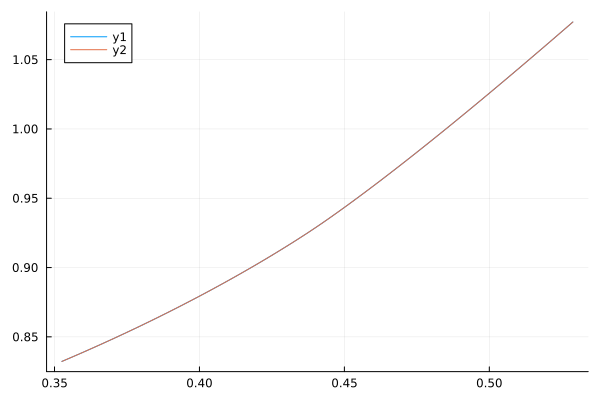

In [60]:
plot(βs,lnZs)
plot!(βs,lnz.([Ising2D(;β=β,J=1,H=0) for β in βs]))

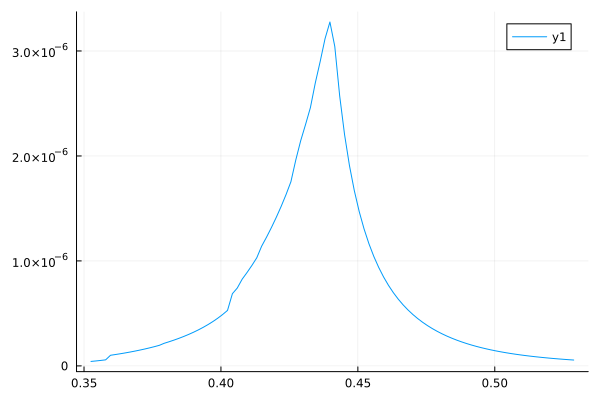

In [61]:
#plot(βs,lnZs)
plot(βs,abs.(lnz.([Ising2D(;β=β,J=1,H=0) for β in βs]) .- (lnZs)) ./ lnz.([Ising2D(;β=β,J=1,H=0) for β in βs]))

In [64]:
function TT_rank(T::TensorMap)
    @tensor TrT  = T[i,j,i,j]
    @tensor TrT² = T[i,j,m,j]*T[m,k,i,k]
    return TrT^2/TrT²
end

TT_rank (generic function with 1 method)

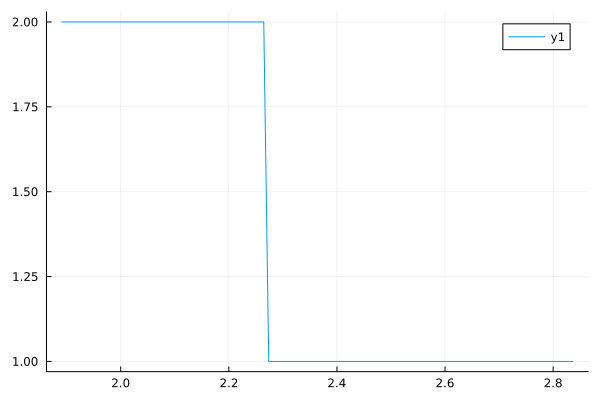

In [71]:
# The gauge invariant quantity
TT_ranks = [real(TT_rank(T)) for T in T_final]
plot(1 ./βs,TT_ranks)

In [84]:
# We can now look at the spectrum of the operator and sort them by sectors
function singular_value_spectrum(T::TensorMap,sector)
    _,Σ,_,_ = tsvd(T,(1,2),(3,4))
    return diag(block(Σ,sector))
end

singular_value_spectrum (generic function with 2 methods)

In [161]:
Σ(T::TensorMap,sector,index) = singular_value_spectrum(T,sector)[index]
Σs(TT,sector,index) = [Σ(T,sector,index) for T in TT]

Σs (generic function with 1 method)

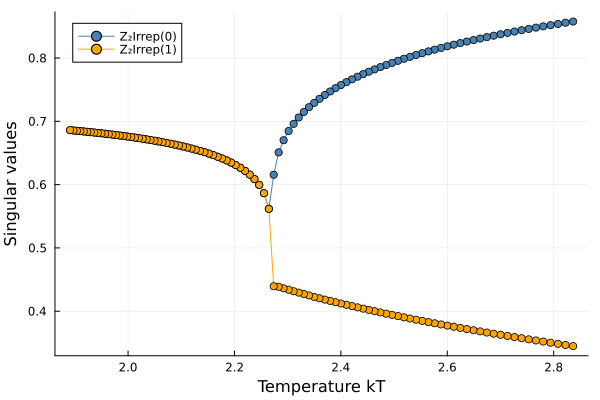

In [187]:
plot(xlabel="Temperature kT",ylabel="Singular values")
plot!(1 ./ βs,Σs(T_final,Z2Irrep(0),1),label="Z₂Irrep(0)",marker=:circ,color=:steelblue)
plot!(1 ./ βs,Σs(T_final,Z2Irrep(1),1),label="Z₂Irrep(1)",marker=:circ,color=:orange)

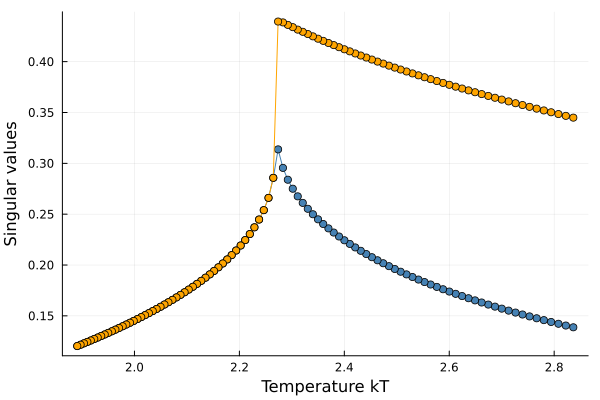

In [188]:
plot(xlabel="Temperature kT",ylabel="Singular values")
plot!(1 ./ βs,Σs(T_final,Z2Irrep(0),2),label="",marker=:circ,color=:steelblue)
plot!(1 ./ βs,Σs(T_final,Z2Irrep(1),2),label="",marker=:circ,color=:orange)


In [86]:
singular_value_spectrum(T_final[end],Z2Irrep(0))[1]

0.68601022538414

In [26]:
lnz(layers,0)

4.828427124746191 + 0.0im

In [27]:
real(lnz(model))

0.9296953983416101

In [6]:
layers = renormalize(layers,20);


In [7]:
TT = layers.layers[end].T;
TrT_Sq = get_trace(layers,50)^2
@tensor Tr_TSq = TT[i,j,k,j]*TT[k,m,i,m] 

0.17442958328819153 + 0.0im

In [8]:
TrT_Sq/Tr_TSq

0.9999999999999999 + 0.0im

In [9]:
layers.n_layers

50

In [10]:
for i in 1:layers.n_layers
    @show i,lnz(layers,i)
end

(i, lnz(layers, i)) = (1, 1.8472469809085366 + 0.0im)
(i, lnz(layers, i)) = (2, 1.3563748831655391 + 0.0im)
(i, lnz(layers, i)) = (3, 1.1555790400700652 + 0.0im)
(i, lnz(layers, i)) = (4, 1.0337086127542974 + 0.0im)
(i, lnz(layers, i)) = (5, 0.9836955704206112 + 0.0im)
(i, lnz(layers, i)) = (6, 0.955395989905573 + 0.0im)
(i, lnz(layers, i)) = (7, 0.9429686692211598 + 0.0im)
(i, lnz(layers, i)) = (8, 0.936095353937327 + 0.0im)
(i, lnz(layers, i)) = (9, 0.9329835984564073 + 0.0im)
(i, lnz(layers, i)) = (10, 0.9312937162751724 + 0.0im)
(i, lnz(layers, i)) = (11, 0.9305118648469141 + 0.0im)
(i, lnz(layers, i)) = (12, 0.9300937257879881 + 0.0im)
(i, lnz(layers, i)) = (13, 0.9298969395973273 + 0.0im)
(i, lnz(layers, i)) = (14, 0.9297930535539635 + 0.0im)
(i, lnz(layers, i)) = (15, 0.9297434926692264 + 0.0im)
(i, lnz(layers, i)) = (16, 0.9297176152395948 + 0.0im)
(i, lnz(layers, i)) = (17, 0.9297051348836655 + 0.0im)
(i, lnz(layers, i)) = (18, 0.9296986784231647 + 0.0im)
(i, lnz(layers, i)) =

In [11]:
V = Z2Space(0=>10,1=>10)
T = TensorMap(rand,ComplexF64,V,V)

TensorMap(Rep[ℤ₂](0=>10, 1=>10) ← Rep[ℤ₂](0=>10, 1=>10)):
* Data for sector (Irrep[ℤ₂](0),) ← (Irrep[ℤ₂](0),):
  0.8553612610109996 + 0.7057985723631507im   …  0.24868394293076213 + 0.6770334854139164im
  0.9228572457055545 + 0.9349158434464745im       0.9724588120719615 + 0.13882787454449497im
  0.8391912873080066 + 0.34981263684834774im      0.8979990957310253 + 0.46371513792008834im
 0.06606246045486996 + 0.45131861538729223im     0.43115399458863346 + 0.012286836900200937im
  0.7491853619700105 + 0.5894105239780434im      0.41466143466321703 + 0.9514761238920441im
  0.7289007102139471 + 0.2583726314298258im   …   0.8452358186005263 + 0.4772282634497821im
  0.8072706578159958 + 0.9314468932208605im       0.9334365361581748 + 0.4251190330293553im
  0.7007628231736268 + 0.22238741210847335im     0.07419664636029366 + 0.5761014037897538im
  0.8830872161242133 + 0.4330625278251782im       0.8880395226551521 + 0.4072530157743083im
  0.5989745799480088 + 0.815485194769296im        0.60222

In [12]:
U,Σ,V = tsvd(T,trunc=truncdim(7));

In [13]:
Σ

TensorMap(Rep[ℤ₂](0=>3, 1=>4) ← Rep[ℤ₂](0=>3, 1=>4)):
* Data for sector (Irrep[ℤ₂](0),) ← (Irrep[ℤ₂](0),):
 7.258899388579424  0.0                 0.0
 0.0                2.0540648266610044  0.0
 0.0                0.0                 1.717957877928387
* Data for sector (Irrep[ℤ₂](1),) ← (Irrep[ℤ₂](1),):
 7.445136038779973  0.0                 0.0                 0.0
 0.0                2.1309132272251072  0.0                 0.0
 0.0                0.0                 1.8859578423135324  0.0
 0.0                0.0                 0.0                 1.501032089220878


In [14]:
domain(Σ)

ProductSpace(Rep[ℤ₂](0=>3, 1=>4))

In [19]:
id(space(Σ,2))

TensorMap(Rep[ℤ₂](0=>3, 1=>4)' ← Rep[ℤ₂](0=>3, 1=>4)'):
* Data for sector (Irrep[ℤ₂](0),) ← (Irrep[ℤ₂](0),):
 1.0  0.0  0.0
 0.0  1.0  0.0
 0.0  0.0  1.0
* Data for sector (Irrep[ℤ₂](1),) ← (Irrep[ℤ₂](1),):
 1.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0
 0.0  0.0  1.0  0.0
 0.0  0.0  0.0  1.0


In [194]:
ising_T0 = T0(Ising2D(;β=1,J=1,H=0),:Z2);

In [195]:
block(ising_T0,Z2Irrep(0))

8×1 Matrix{ComplexF64}:
  4.762195691083632 + 0.0im
 3.6268604078470195 + 0.0im
 3.6268604078470195 + 0.0im
 3.6268604078470195 + 0.0im
 3.6268604078470195 + 0.0im
 3.6268604078470195 + 0.0im
 3.6268604078470195 + 0.0im
 2.7621956910836323 + 0.0im

In [196]:
block(ising_T0,Z2Irrep(1))

8×0 Matrix{ComplexF64}